#        ***Age and Gender Classification***

# *Data Processing*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp drive/'My Drive'/UTKcrop.zip .

In [3]:
from zipfile import ZipFile
with ZipFile('UTKcrop.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [5]:
# All the libraries used in this project
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
import PIL
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [6]:
# Reading all filenames in the 'UTKcrop' directory
file_names = os.listdir('UTKcrop/')

# Extract ages, genders, and load images using list comprehensions
ages = [int(name.split('_')[0]) for name in file_names]
genders = [int(name.split('_')[1]) for name in file_names]
images = [Image.open(os.path.join('UTKcrop', name)) for name in file_names]

In [8]:
df = pd.DataFrame({
    'Images': images,
    'Ages': ages,
    'Genders': genders
})
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,4,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2,0
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,86,0
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,27,1
...,...,...,...
9775,<PIL.JpegImagePlugin.JpegImageFile image mode=...,76,1
9776,<PIL.JpegImagePlugin.JpegImageFile image mode=...,5,0
9777,<PIL.JpegImagePlugin.JpegImageFile image mode=...,4,0
9778,<PIL.JpegImagePlugin.JpegImageFile image mode=...,52,0


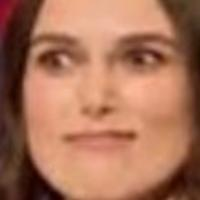

27 1


In [10]:
display(df['Images'][4])
print(df['Ages'][4], df['Genders'][4])

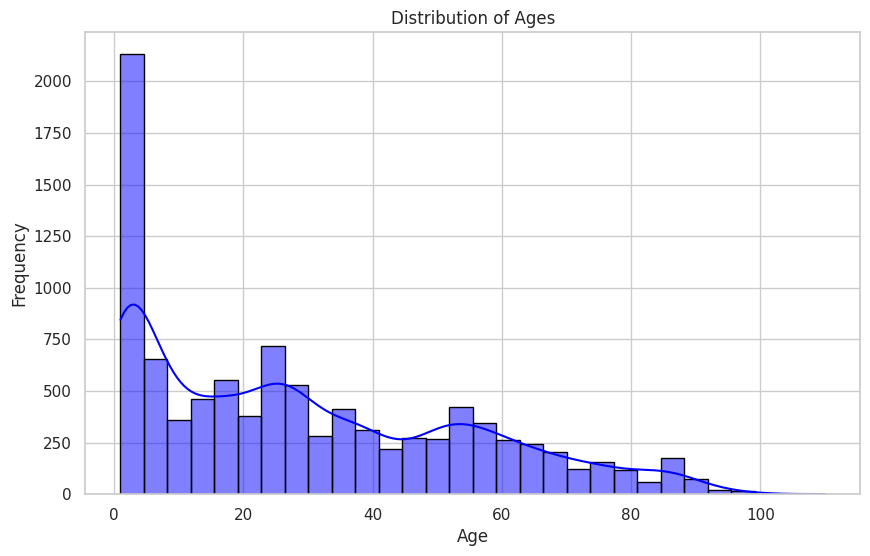

In [11]:
sns.set_theme(style="whitegrid")

# Creating the plot with histplot (which replaces distplot)
plt.figure(figsize=(10, 6))
sns.histplot(df['Ages'], kde=True, bins=30, color="blue", edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()


As there are too many images of age 0 to 4 , so i'm only using 3rd of images at this age

In [ ]:
age_under4 =[]
for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        age_under4.append(df.iloc[i])
age_under4 = pd.DataFrame(age_under4)
age_under4 = age_under4.sample(frac=0.3)

df = df[df['Ages'] > 4]

df = pd.concat([df, age_under4], ignore_index = True)

<Axes: xlabel='Ages', ylabel='Count'>

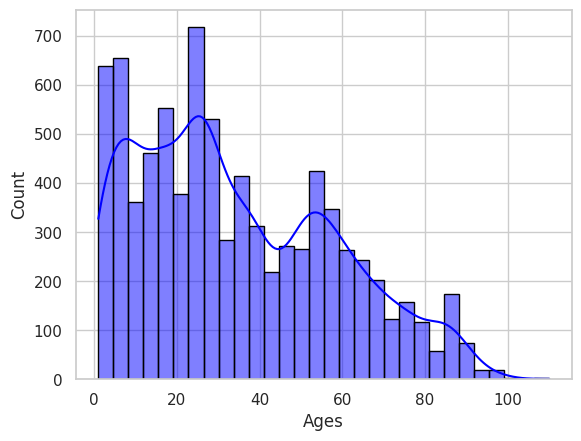

In [ ]:
sns.histplot(df['Ages'], kde=True, bins=30, color="blue", edgecolor='black')

In [ ]:
df = df[df['Ages'] < 80]

As there are not many faces of the people who are 80 so we will be removing those as dataset need more images to train or else it would be in accurate

<Axes: xlabel='Ages', ylabel='Count'>

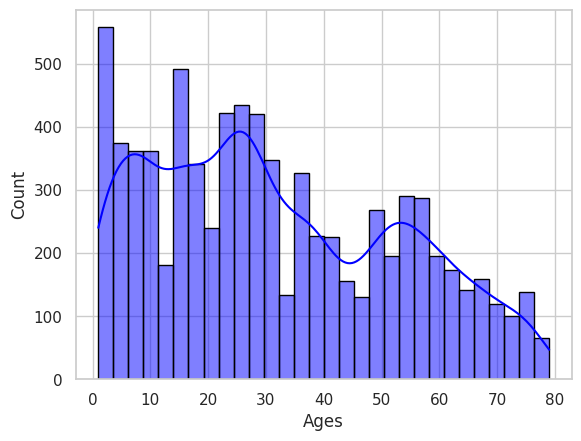

In [ ]:
sns.histplot(df['Ages'], kde=True, bins=30, color="blue", edgecolor='black')

<ipython-input-24-a736758da4e0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Genders', data = df,palette='pastel')


<Axes: xlabel='Genders', ylabel='count'>

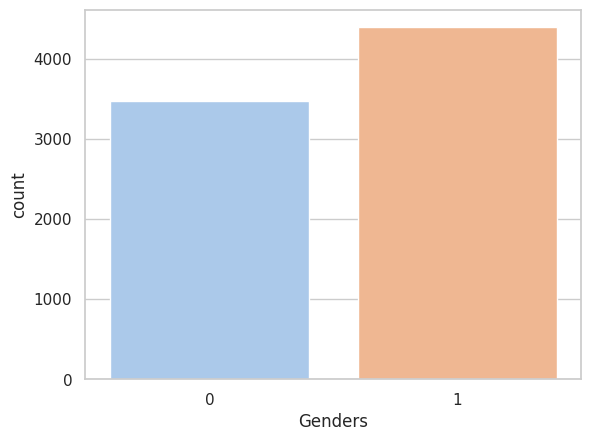

In [ ]:
sns.countplot(x = 'Genders', data = df,palette='pastel')

<ipython-input-25-eea9897a93ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Genders', data = df,palette='pastel')


<Axes: xlabel='Genders', ylabel='count'>

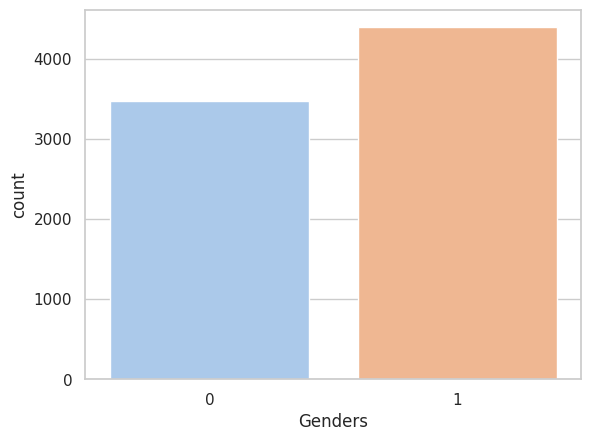

In [ ]:
df = df[df['Genders'] != 3]
sns.countplot(x = 'Genders', data = df,palette='pastel')

#**Creating and and gender model for training and testing**

In [ ]:
img = []
age_gen = []

for i in range(len(df)):
    image_copy = df['Images'].iloc[i].copy()
    resized_image = image_copy.resize((200, 200), PIL.Image.Resampling.LANCZOS)
    array = np.asarray(resized_image)
    img.append(array)
    # Creating a list containing age and gender
    data = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    age_gen.append(data)

x = np.array(img)

In [ ]:
y_age = df['Ages']
y_gen = df['Genders']
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gen, test_size=0.2, stratify=y_gen)

In [ ]:
ageGen_model = Sequential()
ageGen_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(200, 200, 3)))
ageGen_model.add(MaxPooling2D(pool_size=(2,2)))

ageGen_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
ageGen_model.add(MaxPooling2D(pool_size=(2,2)))

ageGen_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
ageGen_model.add(MaxPooling2D(pool_size=(2,2)))

ageGen_model.add(Flatten())
ageGen_model.add(Dense(64, activation='relu'))
ageGen_model.add(Dropout(0.5))
ageGen_model.add(Dense(1, activation='relu'))
ageGen_model.compile(loss='mean_squared_error',
             optimizer=optimizers.Adam(learning_rate=0.0001))

In [ ]:
gender_model = Sequential()
gender_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(200, 200, 3)))
gender_model.add(MaxPooling2D(pool_size=(2,2)))

gender_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))

gender_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
gender_model.add(MaxPooling2D(pool_size=(2,2)))

gender_model.add(Flatten())
gender_model.add(Dense(64, activation='relu'))

gender_model.add(Dropout(0.5))

gender_model.add(Dense(1, activation='sigmoid'))

gender_model.compile(loss='binary_crossentropy',
             optimizer=optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

In [ ]:
data_gender = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = data_gender.flow(x_train_age, y_train_age, batch_size=32)

test_data = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = ageGen_model.fit(train_data, epochs=50, shuffle=True, validation_data=test_data)

Epoch 1/50
197/197 [==============================] - 55s 246ms/step - loss: 574.1447 - val_loss: 461.3646
Epoch 2/50
197/197 [==============================] - 48s 244ms/step - loss: 502.4450 - val_loss: 421.1454
Epoch 3/50
197/197 [==============================] - 48s 245ms/step - loss: 447.1543 - val_loss: 344.0593
Epoch 4/50
197/197 [==============================] - 48s 242ms/step - loss: 400.3172 - val_loss: 349.6204
Epoch 5/50
197/197 [==============================] - 48s 243ms/step - loss: 376.2843 - val_loss: 296.9717
Epoch 6/50
197/197 [==============================] - 47s 239ms/step - loss: 362.8046 - val_loss: 308.4418
Epoch 7/50
197/197 [==============================] - 48s 244ms/step - loss: 364.7300 - val_loss: 269.6222
Epoch 8/50
197/197 [==============================] - 48s 241ms/step - loss: 353.1568 - val_loss: 316.1082
Epoch 9/50
197/197 [==============================] - 48s 242ms/step - loss: 341.3822 - val_loss: 259.2811
Epoch 10/50
197/197 [================

In [ ]:
genderGen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gender = genderGen.flow(x_train_gender, y_train_gender, batch_size=64)

test_gender = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = gender_model.fit(train_gender, epochs=50, shuffle=True, validation_data=test_gender)

Epoch 1/50
99/99 [==============================] - 51s 469ms/step - loss: 0.6393 - accuracy: 0.6261 - val_loss: 0.5794 - val_accuracy: 0.7014
Epoch 2/50
99/99 [==============================] - 46s 469ms/step - loss: 0.5846 - accuracy: 0.6997 - val_loss: 0.5355 - val_accuracy: 0.7243
Epoch 3/50
99/99 [==============================] - 47s 477ms/step - loss: 0.5490 - accuracy: 0.7294 - val_loss: 0.5045 - val_accuracy: 0.7522
Epoch 4/50
99/99 [==============================] - 47s 474ms/step - loss: 0.5134 - accuracy: 0.7573 - val_loss: 0.4629 - val_accuracy: 0.7827
Epoch 5/50
99/99 [==============================] - 47s 472ms/step - loss: 0.4960 - accuracy: 0.7710 - val_loss: 0.4414 - val_accuracy: 0.7980
Epoch 6/50
99/99 [==============================] - 48s 484ms/step - loss: 0.4815 - accuracy: 0.7702 - val_loss: 0.4279 - val_accuracy: 0.7935
Epoch 7/50
99/99 [==============================] - 48s 479ms/step - loss: 0.4602 - accuracy: 0.7840 - val_loss: 0.4100 - val_accuracy: 0.8037

In [13]:
from tensorflow.keras.models import load_model
age_model = load_model("agegenUTK_CNN.h5") # loading the gender model
gender_model = load_model("gender_CNN.h5")

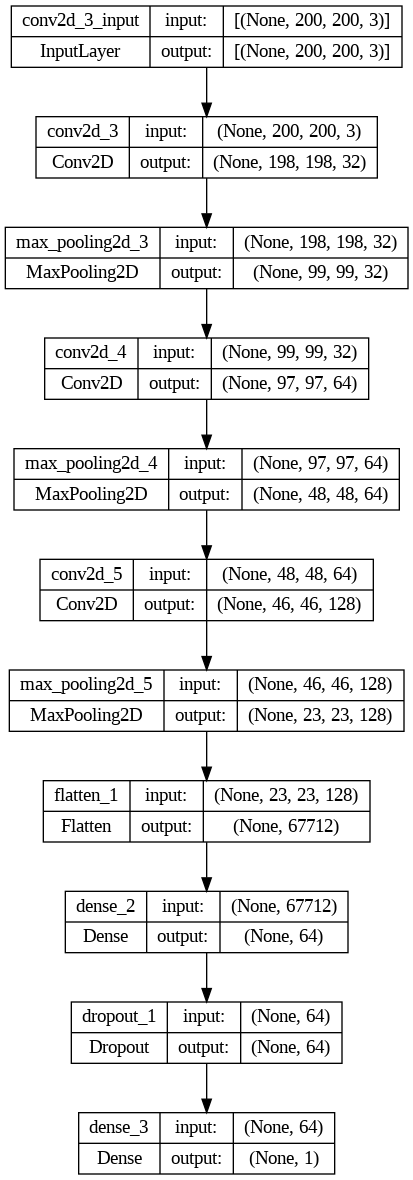

In [ ]:
from tensorflow.keras.utils import plot_model
import IPython.display as display

# Assuming your model is named 'model'
plot_model(age_model, to_file='model.png', show_shapes=True)
display.Image("model.png")

In [14]:
import numpy as np
from PIL import Image
import PIL

def detectFaceImage(pic):
    try:
        im = Image.open(pic)
        width, height = im.size

        # Ensuring left, top, right, and bottom are integer pixel indices
        if width > height:
            diff = (width - height) // 2
            im = im.crop((diff, 0, width - diff, height))
        else:
            diff = (height - width) // 2
            im = im.crop((0, diff, width, height - diff))

        im = im.resize((200, 200), PIL.Image.Resampling.LANCZOS)

        # Normalizing and reshape the image array as expected by the models
        ar = np.asarray(im, dtype=np.float32) / 255.0
        ar = ar.reshape(-1, 200, 200, 3)

        # Model predictions
        age = age_model.predict(ar)
        gender = gender_model.predict(ar)

        # Use threshold to determine gender
        gender_label = 'male' if gender < 0.5 else 'female'

        # Print the results
        print('Age:', int(age), '\n Gender:', gender_label)

        # Resize for output
        return im.resize((300, 300), PIL.Image.Resampling.LANCZOS)

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

1/1 [==============================] - 0s 18ms/step
Age: 27 
 Gender: female


<ipython-input-14-96fbfa130738>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Age:', int(age), '\n Gender:', gender_label)


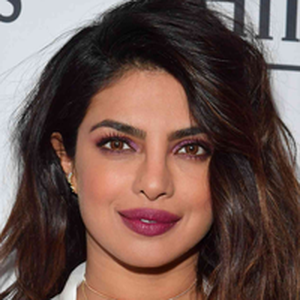

In [16]:
detectFaceImage('now2.jpg')

# **Accessing the webcam from google colab**

In [6]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))